## Note
#### dependencies
xarray, rioxarray, dask, rasterio, geopandas, requests

#### versions:
s3fs==0.5.1, fsspec==0.8.3, fastfuels==1.0.1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from WifireFT import LandFire

In [3]:
bpath="https://wifire-data.sdsc.edu/data/landfire/"

mylf=LandFire(bpath=bpath, bpath_type="http")
mylf.avail_cog

{'CH': [210, 200, 140, 130, 120, 110, 105],
 'CC': [210, 200, 140, 130, 120, 110, 105],
 'CBD': [210, 200, 140, 130, 120, 110, 105],
 'CBH': [210, 200, 140, 130, 120, 110, 105],
 'FBFM40': [210, 200, 140, 130, 120, 110, 105],
 'FBFM13': [120, 110, 105],
 'EVT': [120, 110, 105]}

### Extract a 500 m radius from Landfire Canopy Height

In [4]:
#lat=33.771
#lon=-116.686
lat = 39.871306
lon = -121.389439
radius=500

In [5]:
# Extract a 500 m radius from Landfire Canopy Height:

src=mylf.read_dataset(210,'CH', chunks="auto", masked=True)
srcclip=mylf.query(src, lon, lat, radius)

### Extract a 500 m radius from Landfire Canopy Height (Fastfuels)

In [8]:
import fastfuels
fio = fastfuels.open('https://wifire-data.sdsc.edu:9000/fastfuels/index.fio', ftype='s3')
fio.cache_limit = 1e14

In [10]:
ffdata=fio.query(lon, lat, radius)

Bounding box query found in single source: ca_set/ca_58.fio


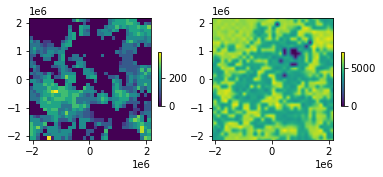

In [18]:
import matplotlib.pyplot as plt
fig5,ax5=plt.subplots(ncols=2)

# landfire (left)
h2=ax5[0].imshow(srcclip[0,:,:], #extent=ffdata.extent)
        extent=[srcclip.x.data.min(), srcclip.y.data.min(), srcclip.x.data.max(), srcclip.y.data.max()])
fig5.colorbar(h2, ax=ax5[0], shrink=0.25)

# fastfuels (right)
h3=ax5[1].imshow(ffdata.data_dict["sav"][:,:,0], extent=ffdata.extent)
fig5.colorbar(h3, ax=ax5[1], shrink=0.25)

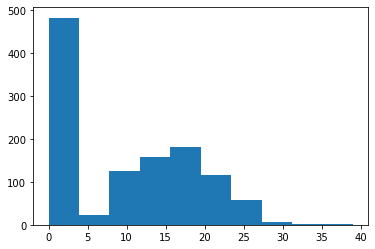

In [12]:
#data is canopy height in m*10
plt.hist(srcclip.data.flatten()/10.);

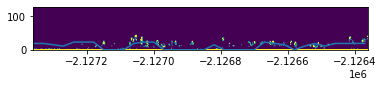

In [13]:
fig2,ax2=plt.subplots(ncols=1)
ax2.imshow(ffdata.data_dict["sav"][500,:,:].T, origin="lower", vmax=1000, 
           extent=[ffdata.extent[0], ffdata.extent[2], 0, 128], )
ax2.plot(srcclip.x.data, srcclip.data[0,17,:]/10.)

In [19]:
#Retrieve data for single point
mylf.select(src, lon, lat)

230.0

### Plot the fuel model as function of time (for different Landfire model years):

In [20]:
dat=mylf.query_all_versions("FBFM40", lon, lat, radius)
dat.keys()

dict_keys([210, 200, 140, 130, 120, 110, 105])

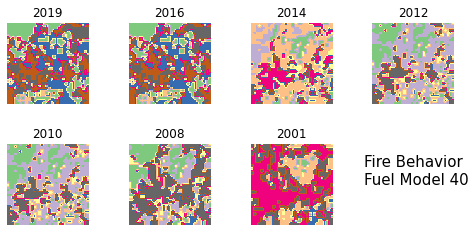

In [21]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(ncols=4, nrows=2, figsize=(8,4))
fig.subplots_adjust(hspace=.25, wspace=.5)

cmap="Accent"

for n,ver in enumerate(dat.keys()):
    h=ax.flatten()[n].imshow(dat[ver][0,:,:], cmap=cmap)
    #fig.colorbar(h, ax=ax.flatten()[n], shrink=0.25)
    ax.flatten()[n].set_title(mylf.versions[ver][0])
    ax.flatten()[n].axis('off')
    
for n in range(7,8):
    ax.flatten()[n].axis('off')
    
ax.flatten()[7].text(-.1, .5, "Fire Behavior\nFuel Model 40", fontsize=15, transform=ax.flatten()[7].transAxes);

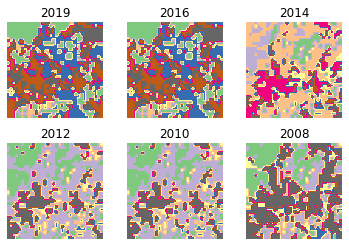

In [22]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(ncols=3, nrows=2, figsize=(6,4))
fig.subplots_adjust(hspace=.25, wspace=.25)

cmap="Accent"

for n in range(6):
    ver=list(dat.keys())[n]
    h=ax.flatten()[n].imshow(dat[ver][0,:,:], cmap=cmap)
    #fig.colorbar(h, ax=ax.flatten()[n], shrink=0.25)
    ax.flatten()[n].set_title(mylf.versions[ver][0])
    ax.flatten()[n].axis('off')

In [23]:
plt.style.use('default')

In [24]:
import numpy as np
np.unique(dat[210].data)

array([ 99, 101, 102, 121, 122, 142, 145, 147, 165, 186], dtype=int16)

In [25]:
attrs=mylf.get_fbfm40_attributes('FBFM40')

In [26]:
attrs

{91: ('NB1', ' Urban/Developed'),
 92: ('NB2', ' Snow/Ice'),
 93: ('NB3', ' Agricultural'),
 98: ('NB8', ' Open Water'),
 99: ('NB9', ' Barren'),
 101: ('GR1',
  ' Short, sparse dry climate grass is short, naturally or heavy grazing, predicted rate of fire spread and flame length low'),
 102: ('GR2',
  ' Low load, dry climate grass primarily grass with some small amounts of fine, dead fuel, any shrubs do not affect fire behavior'),
 103: ('GR3',
  ' Low load, very coarse, humid climate grass continuous, coarse humid climate grass, any shrubs do not affect fire behavior'),
 104: ('GR4',
  ' Moderate load, dry climate grass, continuous, dry climate grass, fuelbed depth about 2 feet'),
 105: ('GR5',
  ' Low load, humid climate grass, fuelbed depth is about 1-2 feet'),
 106: ('GR6',
  ' Moderate load, continuous humid climate grass, not so coarse as GR5'),
 107: ('GR7',
  ' High load, continuous dry climate grass, grass is about 3 feet high'),
 108: ('GR8',
  ' High load, very coarse, cont

In [27]:
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

In [28]:
ax[0].imshow

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'